In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


1. **Distribution of `overall` ratings**:  
   - Visualizing the distribution of product ratings (1-5).  
   - Checking if the dataset is **balanced** or needs resampling.


<ipython-input-2-7e1914421238>:5: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train_data.csv')
<ipython-input-2-7e1914421238>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='overall', data=df, palette='Set2')


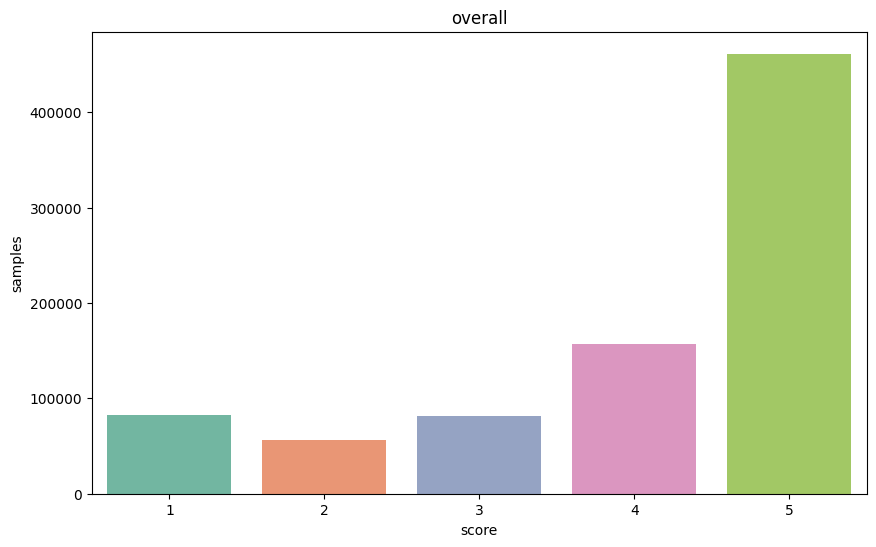

overall:
overall
1     82950
2     56756
3     81239
4    156514
5    461485
Name: count, dtype: int64


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train_data.csv')

plt.figure(figsize=(10,6))
sns.countplot(x='overall', data=df, palette='Set2')
plt.title('overall')
plt.xlabel('score')
plt.ylabel('samples')
plt.show()

distribution = df['overall'].value_counts().sort_index()
print("overall:")
print(distribution)



### همان طور که مشخص است توزیع داده ها برابر نیست من ترجیح دادم برای اینکه ساده تر بشه محاسبات از اور سمپلینگ استفاده نکنم همچنین اندرسمپلینگ
### باعث از دست رفتن داده میشه پس وزن دهی میکنم اگر خواستیم توازن برقرار کنیم

In [7]:
df.describe()

,overall,unixReviewTime
count,838944.000000,8.389440e+05
mean,4.021317,1.483167e+09
std,1.344223,2.229270e+07
min,1.000000,1.451606e+09
25%,3.000000,1.464653e+09
50%,5.000000,1.479254e+09
75%,5.000000,1.499472e+09
max,5.000000,1.538525e+09


In [8]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

2. **Word Cloud Analysis**:  
   - Generating word clouds for **positive (4-5)**, **neutral (3)**, and **negative (1-2)** reviews.  
   - Identifying frequently used words in each category.


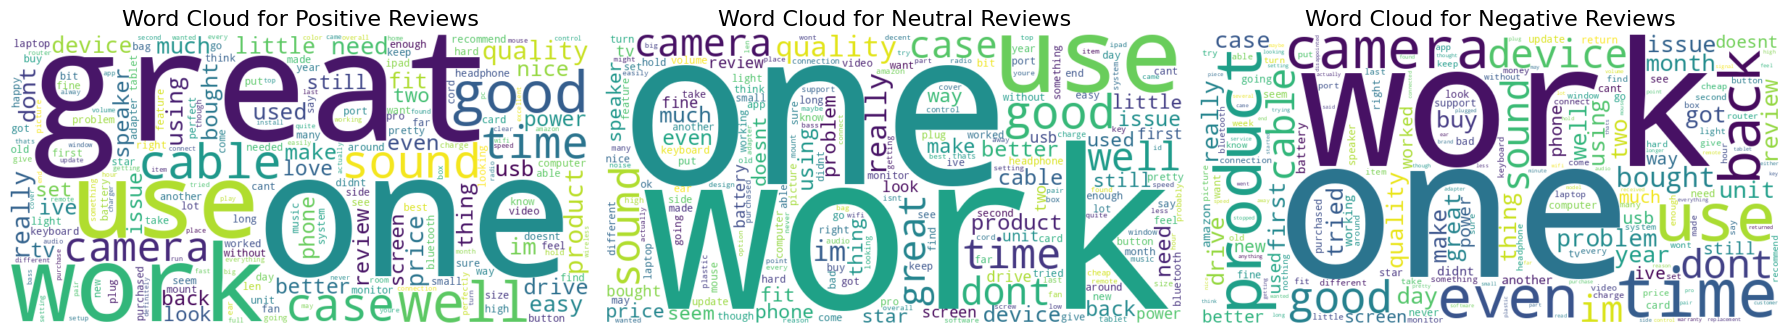

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import nltk
import string

from nltk.corpus import stopwords

def sentiment_label(score):
    if score in [4, 5]:
        return 'positive'
    elif score == 3:
        return 'neutral'
    else:
        return 'negative'

df['sentiment'] = df['overall'].apply(sentiment_label)

def preprocess_text(text):
    text = str(text).lower()
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

df['reviewText'] = df['reviewText'].apply(preprocess_text)

stop_words = set(STOPWORDS)
stop_words.update(stopwords.words('english'))

sentiments = ['positive', 'neutral', 'negative']

plt.figure(figsize=(18, 6))

for i, sentiment in enumerate(sentiments):
    text = " ".join(review for review in df[df['sentiment'] == sentiment]['reviewText'])

    wordcloud = WordCloud(stopwords=stop_words, background_color="white",
                          width=800, height=400, collocations=False).generate(text)

    plt.subplot(1, 3, i+1)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud for {sentiment.capitalize()} Reviews", fontsize=16)

plt.tight_layout()
plt.show()


### کلمات هر دسته مشخص شده و میبینیم به دلیل اینکه در مورد محصولات هست یکسری کلمات پرتکرار تکراری وجود دارد که در زیر با حذف انها برای حال مثبت
### و برای حالت منفی کلمات این دو گروه رو بررسی میکنیم بدون انها

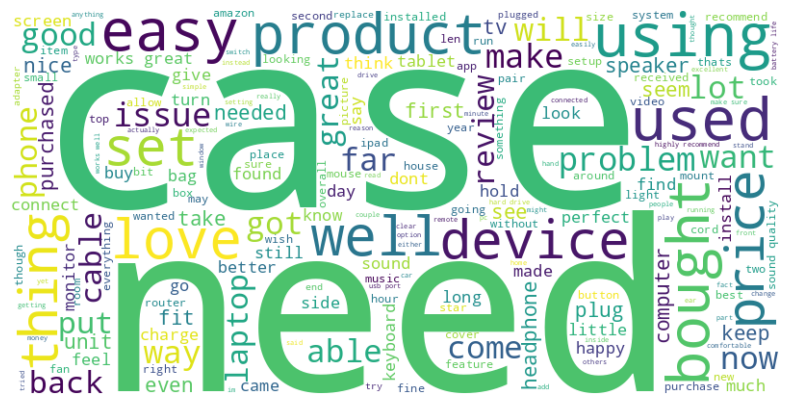

In [10]:
data = df.copy()
positive_reviews = data[data['overall'] >= 4]['reviewText']
neutral_reviews = data[data['overall'] == 3]['reviewText']
negative_reviews = data[data['overall'] <= 2]['reviewText']

positive_text = ' '.join(positive_reviews.dropna())
neutral_text = ' '.join(neutral_reviews.dropna())
negative_text = ' '.join(negative_reviews.dropna())

excluded_words = ['use' , 'one' , 'time' ,'camera' , 'work']

filtered_text = ' '.join([word for word in positive_text.split() if word not in excluded_words])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

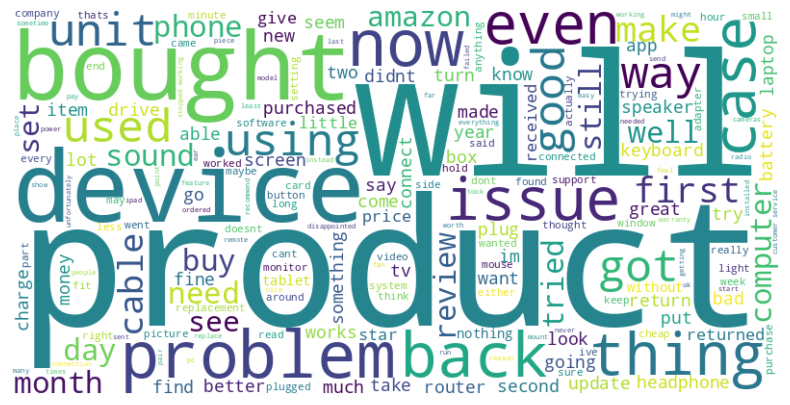

In [11]:
filtered_text = ' '.join([word for word in negative_text.split() if word not in excluded_words])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

3. **Top 10 Users with Most Helpful Votes**:  
   - Identifying reviewers with the highest sum of `vote` counts.


In [ ]:
import pandas as pd

def convert_vote(x):
    try:
        s = str(x).replace(',', '')
        return int(float(s))
    except Exception as e:
        return 0

df['vote'] = df['vote'].fillna(0).apply(convert_vote)


df['vote'] = df['vote'].apply(lambda x: int(str(x).replace(',', '')) if isinstance(x, str) else int(x))

vote_sums = df.groupby('reviewerName')['vote'].sum()

top_10_reviewers = vote_sums.sort_values(ascending=False).head(10)

top_10_reviewers = top_10_reviewers.reset_index()
top_10_reviewers.columns = ['reviewerName', 'total_votes']

print(top_10_reviewers)


      reviewerName  total_votes
0  Amazon Customer        28871
1     Benson Leung         4572
2          Michael         3710
3       Voltron00x         3181
4          Obi Wan         3150
5             Mike         3000
6           nycebo         2978
7  Kindle Customer         2927
8             John         2730
9          Cthulhu         2657


4. **Review Length Analysis**:  
   - Plotting histogram of **reviewText length** (character count).  
   - Checking if we need to **set length limits** for model training.


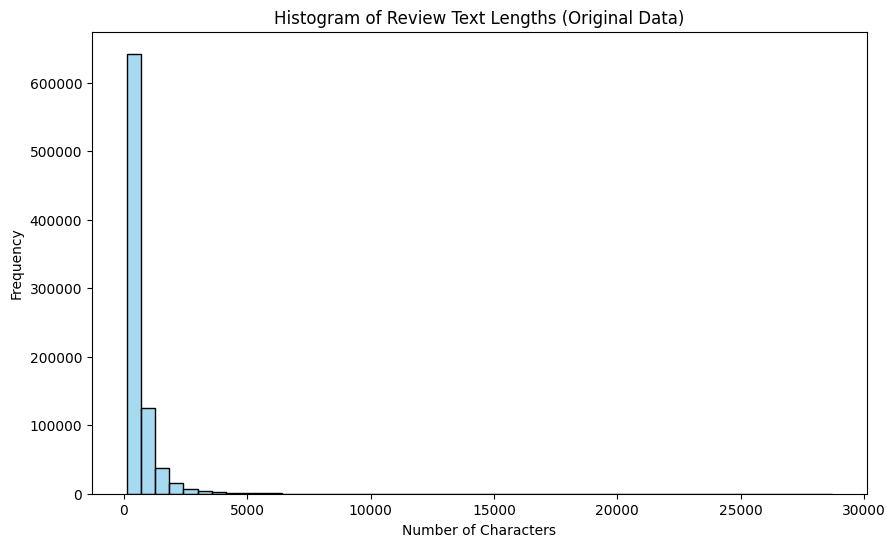

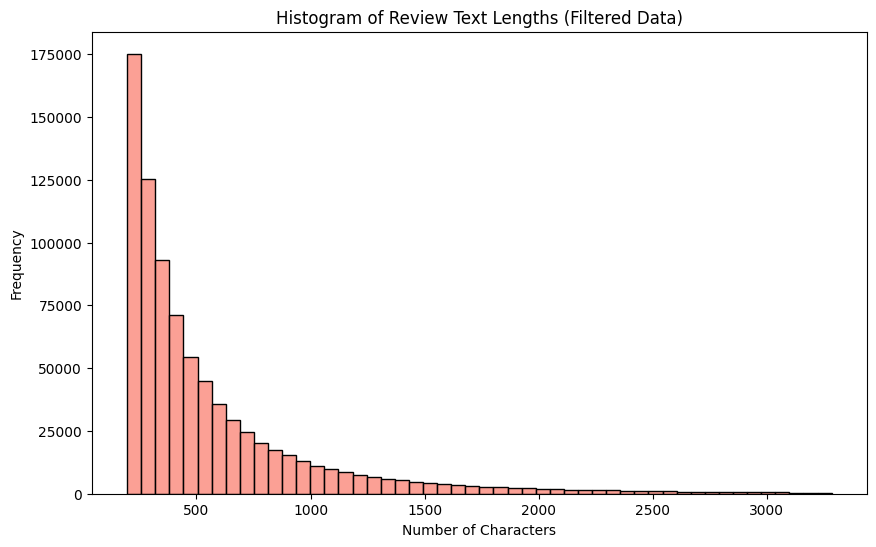

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df['text_length'] = df['reviewText'].astype(str).apply(len)

plt.figure(figsize=(10,6))
sns.histplot(df['text_length'], bins=50, color='skyblue', edgecolor='black')
plt.title("Histogram of Review Text Lengths (Original Data)")
plt.xlabel("Number of Characters")
plt.ylabel("Frequency")
plt.show()

lower_bound = df['text_length'].quantile(0.01)
upper_bound = df['text_length'].quantile(0.99)
filtered_df = df[(df['text_length'] >= lower_bound) & (df['text_length'] <= upper_bound)]

plt.figure(figsize=(10,6))
sns.histplot(filtered_df['text_length'], bins=50, color='salmon', edgecolor='black')
plt.title("Histogram of Review Text Lengths (Filtered Data)")
plt.xlabel("Number of Characters")
plt.ylabel("Frequency")
plt.show()



In [2]:
# 

5. **Products with Most 5-Star Ratings**:  
   - Listing **top 10 products** with the highest number of **5-star reviews**.


In [ ]:
df_map = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/title_brand.csv")

In [ ]:
import pandas as pd


df_five_star = df[df['overall'] == 5]

five_star_counts = df_five_star.groupby('asin').size().reset_index(name='count_5star')

top_10 = five_star_counts.sort_values('count_5star', ascending=False).head(10)

df_map = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/title_brand.csv")

top_10_merged = pd.merge(top_10, df_map, on='asin', how='left')

top_10_merged = top_10_merged.sort_values('count_5star', ascending=False)

result = top_10_merged[['brand', 'title', 'count_5star']]

result


,brand,title,count_5star
0,Cambridge Soundworks,OontZ Angle 3 Enhanced Stereo Edition IPX5 Spl...,1163
1,NETGEAR,NETGEAR N300 WiFi Range Extender (EX2700),659
2,Roku,Roku Streaming Stick (3600R) - HD Streaming Pl...,600
3,StarTech,StarTech USB 2.0 to SATA IDE Adapter (USB2SATA...,598
4,Logitech,Logitech M570 Wireless Trackball Mouse &ndash;...,552
5,Samsung,Samsung 850 EVO 500GB 2.5-Inch SATA III Intern...,529
6,Asus,ASUS Tri-Band Gigabit (AC3200) WiFi Router (Up...,471
7,VideoSecu,VideoSecu ML531BE TV Wall Mount for Most 27&qu...,448
8,"Arlo Technologies, Inc",Arlo - Wireless Home Security Camera System | ...,433
9,Samsung,Samsung 850 EVO 250GB 2.5-Inch SATA III Intern...,431


6. **Top Brands with Most Reviews**:  
   - Identifying **top 10 brands** with the highest review count.  
   - Calculating the **average rating per brand**.


In [ ]:
import pandas as pd


df_merged = pd.merge(df, df_map, on='asin', how='left')

brand_stats = df_merged.groupby('brand').agg(
    review_count=('asin', 'count'),
    avg_rating=('overall', 'mean')
).reset_index()

top_10_brands = brand_stats.sort_values('review_count', ascending=False).head(10)

top_10_brands_sorted = top_10_brands.sort_values('avg_rating', ascending=False)

result = top_10_brands_sorted[['brand', 'avg_rating']]

print(result)


              brand  avg_rating
889           Anker    4.244320
790    AmazonBasics    4.201468
10375       Sabrent    4.028005
10428       SanDisk    3.958810
7219       Logitech    3.954061
10423       Samsung    3.941268
10924          Sony    3.938726
11509       TP-LINK    3.928681
1091           Asus    3.855550
8188        NETGEAR    3.836274


# 🔍 We aim to analyze user satisfaction related to **product warranty** by extracting relevant reviews.

In [ ]:
import pandas as pd
import gensim.downloader as api

print("Loading pre-trained word2vec model... (this may take a while)")
model = api.load("word2vec-google-news-300")
print("Model loaded.")

keywords = ["warranty", "guarantee"]

search_keywords = set(keywords)

for word in keywords:
    try:
        similar = model.most_similar(word, topn=5)
        for sim_word, sim_score in similar:
            search_keywords.add(sim_word)
    except KeyError:
        print(f"'{word}' not found in model vocabulary.")

print("Search keywords:", search_keywords)

def contains_keyword(text, keywords):
    text_lower = text.lower()
    for kw in keywords:
        if kw.lower() in text_lower:
            return True
    return False

df['warranty_related'] = df['reviewText'].astype(str).apply(lambda x: contains_keyword(x, search_keywords))

df_warranty = df[df['warranty_related'] == True]

warranty_rating = df_warranty.groupby('asin')['overall'].mean().reset_index(name='avg_overall_warranty')

print("Average Overall Rating for Warranty-Related Reviews (per product):")
print(warranty_rating)


Loading pre-trained word2vec model... (this may take a while)
[==================================================] 100.0% 1662.8/1662.8MB downloaded
Model loaded.
Search keywords: {'assure', 'guaranteed', 'warranty', 'Limited_Warranty', 'assurances', 'guarantee', 'warranties', 'lifetime_warranty', 'Warranty', 'guarantees', 'warrantee', 'guaranteeing'}
Average Overall Rating for Warranty-Related Reviews (per product):
             asin  avg_overall_warranty
0      6541654530                   1.0
1      9800466657                   5.0
2      B000001OM4                   4.0
3      B00000J4EY                   3.0
4      B00000K2YR                   1.0
...           ...                   ...
10744  B01HIS5N3K                   4.0
10745  B01HIURQWE                   5.0
10746  B01HIWBU7Y                   5.0
10747  B01HIZEW1C                   5.0
10748  B01HJ8E11E                   5.0

[10749 rows x 2 columns]


In [ ]:
import pandas as pd
from sentence_transformers import SentenceTransformer, util
import torch

print("Loading Sentence Transformer model...")
model = SentenceTransformer('all-MiniLM-L6-v2')
print("Model loaded.")

warranty_query = "This review discusses the warranty or guarantee of the product."
query_embedding = model.encode(warranty_query, convert_to_tensor=True)

def is_warranty_related(review_text, threshold=0.5):
    review_embedding = model.encode(review_text, convert_to_tensor=True)
    similarity = util.cos_sim(review_embedding, query_embedding)
    return similarity.item() > threshold

df['warranty_related'] = df['reviewText'].apply(lambda x: is_warranty_related(x, threshold=0.5))

df_warranty = df[df['warranty_related'] == True]

warranty_rating = df_warranty.groupby('asin')['overall'].mean().reset_index(name='avg_overall_warranty')

print("Average Overall Rating for Warranty-Related Reviews (per product):")
print(warranty_rating)


Loading Sentence Transformer model...
Model loaded.
Average Overall Rating for Warranty-Related Reviews (per product):
           asin  avg_overall_warranty
0    B0000510NU                   4.0
1    B00006B81E                   5.0
2    B00006B82M                   1.0
3    B00007FHDP                   1.0
4    B0002H02ZY                   4.0
..          ...                   ...
156  B01E524URC                   3.0
157  B01FIIU7JW                   3.0
158  B01FOHJAY0                   5.0
159  B01FRLCYWI                   4.0
160  B01HC88A68                   5.0

[161 rows x 2 columns]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# 🤖 Sentiment Analysis Model using BERT

## 🔹 Overview
This section implements a **BERT-based model** to predict user sentiment on a **1 to 5 scale** based on review text.

## 🔹 Steps

### **1️⃣ Data Preprocessing**
- Remove **stopwords**.
- Convert text to **lowercase**.
- Limit review length to **256 words**.

### **2️⃣ Model & Tokenizer**
- Using **`bert-base-uncased`**.
- Tokenizing text using **BERT Tokenizer**.

### **3️⃣ Dataset Preparation**
- Split into **90% training & 10% validation**.
- Custom `Dataset` class for handling text inputs.

### **4️⃣ Training Configuration**
- **Epochs**: 2
- **Batch size**: 16
- **Eval every**: 500 steps
- **Learning rate**: `2e-5`
- **FP16** for optimization.

### **5️⃣ Model Training**
- Using **`Trainer`** from Hugging Face.
- Metrics: **F1-score (micro) & Accuracy**.

### **6️⃣ Prediction & Submission**
- Predict on test dataset.
- Save results to **`q2_submission.csv`** (without index).

## ✅ **Final Output: `q2_submission.csv` Ready! **


In [1]:
from google.colab import drive
drive.mount('/content/drive')
import wandb
wandb.init(mode="disabled")

import pandas as pd
import numpy as np
import torch
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

def preprocess_text(text, limit=256):

    text = text.lower()
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    tokens = tokens[:limit]
    return " ".join(tokens)

train_path = "/content/drive/MyDrive/Colab Notebooks/train_data.csv"
test_path = "/content/drive/MyDrive/Colab Notebooks/test_data.csv"

df_train = pd.read_csv(train_path)
df_train = df_train[df_train["reviewText"].notnull()].copy()

if len(df_train) > 200000:
    df_train = df_train.sample(n=200000, random_state=42)

model_name = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=5)

class ReviewsDataset(torch.utils.data.Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=256):
        self.texts = texts.reset_index(drop=True)
        self.labels = labels.reset_index(drop=True)
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = preprocess_text(str(self.texts[idx]), limit=self.max_length)
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            padding="max_length",
            truncation=True,
            return_tensors="pt"
        )
        item = {key: encoding[key].squeeze(0) for key in encoding.keys()}
        label = self.labels[idx] - 1
        item["labels"] = torch.tensor(label, dtype=torch.long)
        return item

train_texts, val_texts, train_labels, val_labels = train_test_split(
    df_train["reviewText"], df_train["overall"], test_size=0.1, random_state=42
)

train_dataset = ReviewsDataset(train_texts, train_labels, tokenizer, max_length=256)
val_dataset = ReviewsDataset(val_texts, val_labels, tokenizer, max_length=256)

training_args = TrainingArguments(
    output_dir="./results",
    num_train_epochs=2,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    evaluation_strategy="steps",
    eval_steps=500,
    save_steps=500,
    logging_steps=100,
    learning_rate=2e-5,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    fp16=True
)

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    f1 = f1_score(labels, predictions, average='micro')
    acc = accuracy_score(labels, predictions)
    return {"accuracy": acc, "f1": f1}

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics
)

trainer.train()

df_test = pd.read_csv(test_path)

class ReviewsTestDataset(torch.utils.data.Dataset):
    def __init__(self, texts, tokenizer, max_length=256):
        self.texts = texts.reset_index(drop=True)
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = preprocess_text(str(self.texts[idx]), limit=self.max_length)
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            padding="max_length",
            truncation=True,
            return_tensors="pt"
        )
        item = {key: encoding[key].squeeze(0) for key in encoding.keys()}
        return item

test_dataset = ReviewsTestDataset(df_test["reviewText"], tokenizer, max_length=256)

preds_output = trainer.predict(test_dataset)
predictions = np.argmax(preds_output.predictions, axis=-1) + 1

submission = pd.DataFrame({"predicted": predictions})
submission.to_csv("/content/drive/MyDrive/Colab Notebooks/q2_submission.csv", index=False)

print("FILE CREATED")


Mounted at /content/drive


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
<ipython-input-1-f96609308044>:36: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv(train_path)
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


Step,Training Loss,Validation Loss,Accuracy,F1
500,0.979200,0.920889,0.627400,0.627400
1000,0.906700,0.867602,0.655350,0.655350
1500,0.825700,0.819577,0.676850,0.676850
2000,0.851800,0.836610,0.676450,0.676450
2500,0.853800,0.798878,0.687950,0.687950
3000,0.805300,0.788631,0.687250,0.687250
3500,0.800400,0.760097,0.701150,0.701150
4000,0.791400,0.748630,0.701700,0.701700
4500,0.742100,0.750556,0.708350,0.708350
5000,0.761100,0.741540,0.706250,0.706250


Step,Training Loss,Validation Loss,Accuracy,F1
500,0.979200,0.920889,0.627400,0.627400
1000,0.906700,0.867602,0.655350,0.655350
1500,0.825700,0.819577,0.676850,0.676850
2000,0.851800,0.836610,0.676450,0.676450
2500,0.853800,0.798878,0.687950,0.687950
3000,0.805300,0.788631,0.687250,0.687250
3500,0.800400,0.760097,0.701150,0.701150
4000,0.791400,0.748630,0.701700,0.701700
4500,0.742100,0.750556,0.708350,0.708350
5000,0.761100,0.741540,0.706250,0.706250


FILE CREATED
